<h2><font color="#004D7F" size=6>Tratamiento de datos para MD (Parte II)</font></h2>



<h1><font color="#004D7F" size=5>Feature Selection</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ing. Miguel Carlos Pita</font><br>
<font color="#004D7F" size=3>Modelizado de Minería de Datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. CSV](#section11)
    * [1.1. Librerías](#section12)
* [2. Técnicas de Feature selection](#section2)
    * [2.1. Coeficiente de correlación](#section21)
    * [2.2. Características altamente correlacionadas](#section22)
    * [2.3. Eliminación Backward](#section23)
    * [2.4. Selección univariable](#section24)
    * [2.5. Eliminación recursiva de características](#section25)
* [3. Conclusión](#section3)

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

En resumen, Feature Selection, también llamado como selección de mejores características o atributos, es el proceso de seleccionar un subconjunto de características pertinentes (variables, predictores) para su uso en construcción de modelos. 

Los predictores son las variables o características utilizadas para hacer predicciones en un modelo de aprendizaje automático. Son los atributos que proporcionan información sobre el problema que se está analizando y que el modelo utiliza para generar sus predicciones o resultados.

Las técnicas de feature selection son utilizadas por cuatro razones:
* Simplificación de modelos con el fin de hacerlas más sencillas de interpretar para los usuarios/investigadores.
* Menor tiempo de entrenamiento.
* Evitar la maldición de la dimensionalidad (curse of dimensionality).

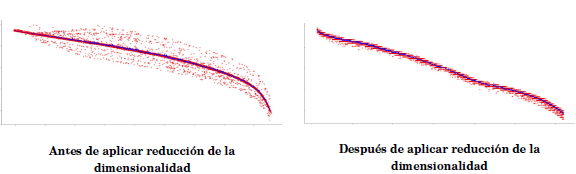

Este gráfico ilustra cómo la reducción de la dimensionalidad puede ayudar a evitar la maldición de la dimensionalidad. La maldición de la dimensionalidad ocurre cuando hay demasiadas variables o características en un conjunto de datos, lo que hace que los modelos sean más complejos y difíciles de entrenar.

**Antes de aplicar reducción de la dimensionalidad (gráfico de la izquierda):** se observa que el modelo parece estar ajustado de manera muy detallada a los puntos de datos (en rojo), lo que puede indicar que el modelo está sobrefitteando (overfitting) o capturando ruido irrelevante. Esto es común cuando hay demasiadas características en los datos y el modelo intenta ajustar todos los puntos.

**Después de aplicar reducción de la dimensionalidad (gráfico de la derecha):** se observa que el modelo ahora sigue una tendencia más clara, lo que sugiere que las características irrelevantes han sido eliminadas y el modelo está capturando mejor el patrón subyacente de los datos. Esto simplifica el modelo, mejora su generalización y reduce la varianza, lo que hace que sea más eficiente al predecir nuevos datos.

* Generalización realzada por reducir _overfitting_ (formalmente, reducción de varianza).

La generalización realzada significa que el modelo puede hacer predicciones más precisas en datos nuevos, no vistos, al reducir el overfitting. El overfitting ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, capturando incluso el ruido o detalles irrelevantes, lo que reduce su capacidad de generalizar a nuevos datos. Al reducir la varianza, es decir, las fluctuaciones excesivas en el modelo, se evita que el modelo sea demasiado específico para el conjunto de entrenamiento, mejorando su desempeño en situaciones reales.

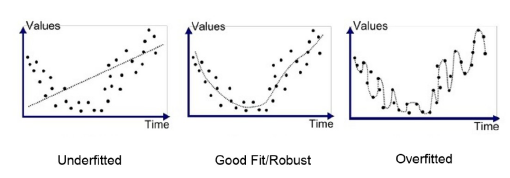

<a id="section11"></a>
## <font color="#004D7F"> 1.1. CSV</font>

Se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

In [1]:
import pandas as pd
import numpy as np

ruta_clas = 'data/pima-indians-diabetes.data.csv'

nombres_clas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_clas = pd.read_csv(ruta_clas, names=nombres_clas)

array_clas = df_clas.values
X_clas = array_clas[:, 0:8] # Separamos del conjunto de datos la matriz X (variables independientes)
y_clas = array_clas[:, 8] # Separamos del conjunto de datos el vector y (variable dependientes)

In [3]:
df_clas

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
array_clas

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [7]:
X_clas

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y_clas

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Vemos si la clase está desbalanceada

In [11]:
# Primera forma de observar el desbalance

df_clas.groupby('class').size()

class
0    500
1    268
dtype: int64

In [13]:
# Segunda forma de observar el desbalance

df_clas['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

* **Regresión**: se usará el conjunto de datos Boston House Price. Este es un problema de regresión donde todas las características de entrada también son numéricas.

In [50]:
import numpy as np
import pandas as pd

ruta_reg='data/housing.csv'

nombres_reg = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_reg = pd.read_csv(ruta_reg, sep=r'\s+', names=nombres_reg)

array_reg = df_reg.values
X_reg = array_reg[:,:13]
y_reg = array_reg[:,13]

In [17]:
df_reg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [19]:
array_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [21]:
X_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [23]:
y_reg

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Librerías</font>

Por último vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo del siguiente cuaderno.

In [52]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Técnicas de Feature selection</font>

La selección de las características correctas en sus datos puede significar la diferencia entre un rendimiento mediocre con largos tiempos de entrenamiento y un gran rendimiento con tiempos de entrenamiento cortos. 

Cuantos más datos ordenados, robustos y estructurados sí que es mejor, ahora bien si tengo datos que no lo son y que tienen sesgo por ejemplo, añadirán mucho ruido al modelo.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Coeficiente de correlación </font>

El coeficiente de correlación (Pearson) mide el grado de relación de dos variables. Determina cuánto cambian dos atributos características juntos.

Cuando hablamos de coeficiente de correlación conocemos que los números entre $+1$ y $-1$ representa la interacción y la dirección de la relación entre dos variables. Las correlaciones que están más cerca de $+1$ y $-1$ se encuentran más relacionadas y son más capaces de predecir con precisión. Esto último cuando hablamos de correlación entre una característica determinada y el atributo clase, en este caso _MEDV_ el cual representa el valor de una casa en miles de dólares, esta correlación será alta si es mayor o igual a 0.75. Por otra parte, cuando estamos analizando la correlación entre 2 características lo ideal es que la correlación sea baja. La idea es que aquellas características que tienen una alta correlación con la variable dependiente son predictores fuertes cuando se usan en un modelo.

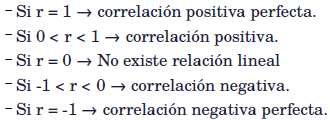

Podemos observar que las características que añaden más información al atributo clase (_MEDV_) es _LSTAT_ y _RM_ (estos no deberán eliminarse); aunque para la técnica que tenemos que utilizar lo que necesitamos es poder descartar los que menos información añadan (por ejemplo en este caso la característica _CHAS_ y _DIS_).

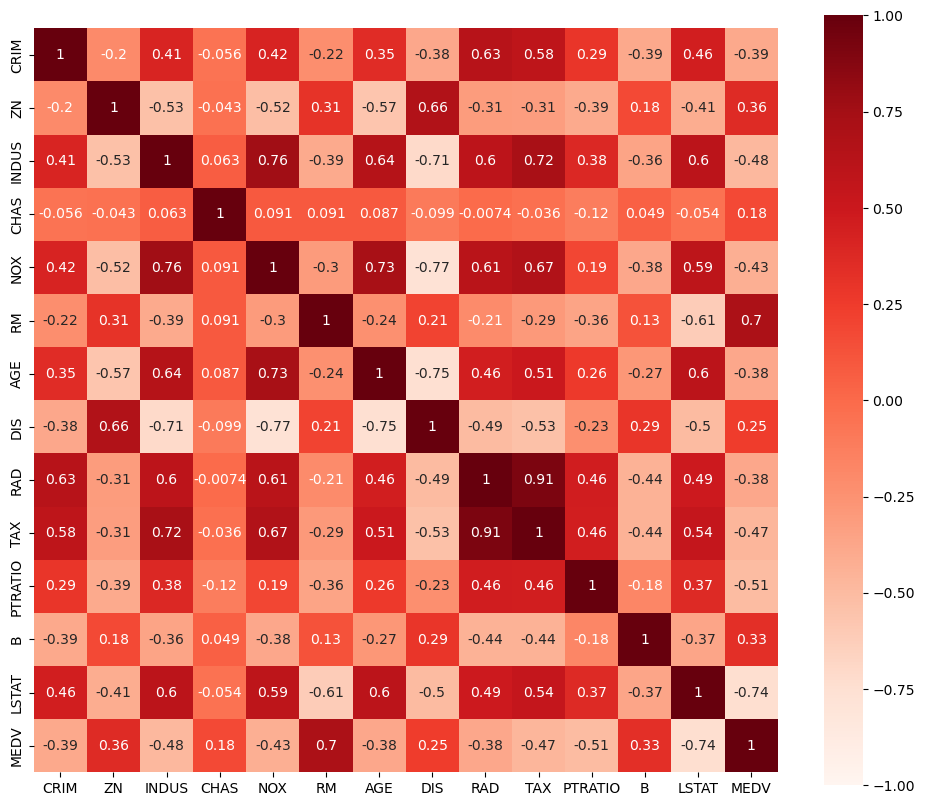

In [33]:
correlacion = df_reg.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlacion, vmin=-1, vmax=1, square=True, annot=True, cmap=plt.cm.Reds)
plt.show()

**cmap:** Este parámetro acepta un mapa de colores, que puede ser:

* Una cadena que representa el nombre de un mapa de colores (por ejemplo, 'viridis', 'plasma', 'coolwarm').

* Un objeto de mapa de colores de matplotlib, al que se puede acceder a través de plt.cm.

In [35]:
# También podemos ver sólo la correlación con el atributo clase ('MEDV')
corr_carac_clase = abs(correlacion['MEDV'])
corr_carac_clase

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [37]:
carac_impor = corr_carac_clase[corr_carac_clase > 0.60]
# por más que 0.75 es lo indicado anteriormente, el punto de corte no es rígido (depende del contexto)
carac_impor

RM       0.695360
LSTAT    0.737663
MEDV     1.000000
Name: MEDV, dtype: float64

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Características altamente correlacionadas </font>

Python no tiene definida una librería con una función que nos agilice este trabajo. Por tanto tendremos que crear una función que nos permita este trabajo de recolección de características altamente correlacionadas.

En general, desearemos eliminar los atributos con una correlación absoluta de 0.75 o superior (debemos eliminar uno de los 2 atributos o columnas que posean dicha alta correlación). Es por eso que en el siguiente código eliminaremos las columnas _NOX_ _DIS_ y _TAX_ que tienen una correlación > 0.75.

In [39]:
corr_matriz = df_reg.corr().abs() # queremos sólo los valores positivos
corr_matriz

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536


In [49]:
triang_sup = corr_matriz.where(np.triu(np.ones(corr_matriz.shape), k=1).astype(np.bool_))
triang_sup
# Este código extrae el triángulo superior de la matriz de correlación, enmascarando efectivamente el triángulo inferior al establecer esos valores en NaN.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,NaN,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,NaN,NaN,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,NaN,NaN,NaN,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,NaN,NaN,NaN,NaN,NaN,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,0.441808,0.543993,0.468536


Este código realiza un filtrado de la matriz de correlación corr_matrix para dejar únicamente la parte superior de la matriz (por encima de la diagonal) y establecer como NaN los valores de la parte inferior:

**1. np.triu(np.ones(corr_matrix.shape), k=1:**

* np.ones(corr_matrix.shape): Crea una matriz de unos con las mismas dimensiones que la matriz de correlación corr_matrix.

* np.triu(..., k=1): Toma la matriz de unos y extrae la parte superior (por encima de la diagonal principal). k=1 indica que no se incluirá la diagonal principal. Por lo tanto, se genera una matriz triangular superior (con unos por encima de la diagonal y ceros en el resto).

**2. .astype(np.bool_):**

* .astype(np.bool_): Convierte la matriz de unos y ceros en valores booleanos (True donde había un 1, y False donde había un 0). Así, se obtiene una máscara booleana que indica qué valores de la matriz original deben ser mantenidos o ignorados.

**3. corr_matrix.where(...):**

* .where(): Utiliza la máscara booleana creada para filtrar la matriz de correlación. La función where mantiene los valores donde la condición es True (en la parte superior) y establece NaN donde la condición es False (en la parte inferior).

In [43]:
unos = np.ones(corr_matriz.shape)
unos

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [45]:
triangulo = np.triu(unos)
triangulo

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [47]:
triangulo_1 = np.triu(unos, k=1)
triangulo_1

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
booleano = triangulo_1.astype(np.bool_)
booleano

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         

In [54]:
triang_sup = corr_matriz.where(booleano)
triang_sup

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,NaN,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,NaN,NaN,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,NaN,NaN,NaN,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,NaN,NaN,NaN,NaN,NaN,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,0.441808,0.543993,0.468536


In [56]:
# Ahora determinamos mediante un filtro los atributos altamente correlacionados entre sí
# En este caso consideramos una correlación alta entre 0.75 y 1
# Aplicamos list-comprehension
elimin = [columna for columna in triang_sup.columns if any (triang_sup[columna] > 0.75)]
elimin

['NOX', 'DIS', 'TAX']

**Versión Ampliada Equivalente de la Celda de Código Superior:**

    to_drop = []

    for column in upper.columns:

        if any(upper[column] > 0.75):
    
            to_drop.append(column)

In [58]:
# Eliminamos las características que tienen correlación > 0.75
df_reg_sin_car_corr = df_reg.drop(df_reg[elimin], axis=1) # axis=1 indica que se eliminen columnas y no filas
df_reg_sin_car_corr

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,6.575,65.2,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,6.593,69.1,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,6.120,76.7,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,6.976,91.0,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,6.794,89.3,1,21.0,393.45,6.48,22.0


In [60]:
df_reg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<a id="section23"></a>
## <font color="#004D7F"> 2.3. Eliminación Backward </font>

Al principio le brindamos todas las características posibles al modelo. Verificamos el rendimiento del modelo y luego eliminamos iterativamente las características de peor rendimiento una por una hasta que el rendimiento general del modelo se encuentre en un rango aceptable.

La métrica de rendimiento utilizada aquí para evaluar el rendimiento de la característica es $p-value$. Si el valor $p$ está por encima de 0.05, eliminamos la característica, de lo contrario la conservamos.

Como podemos ver, la variable _AGE_ tiene el valor más alto: 0.9582293, que es mayor que 0.05. Además _INDUS_ también tiene un valor mayor a 0.05, por tanto, eliminaremos ambas características (de forma análoga a lo efectuado en el apartado _2.2 Características altamente correlacionadas_).

En el proceso de Eliminación Backward, el procedimiento correcto implica aplicar iterativamente el ajuste del modelo usando sm.OLS, eliminando las características con $p-values$ por encima de un umbral (como 0.05) en cada iteración. Es decir, cada vez que eliminas una característica con un $p-value$ alto, debes volver a ajustar el modelo sin esa característica y verificar los $p-values$ nuevamente. El proceso se repite hasta que ya no queden características con un $p-value$ superior al umbral establecido.

In [8]:
# Para poder emplear statsmodels se exige agregar una constante "1" en el DF
X_1 = sm.add_constant(X_reg)
X_1

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
X_1_df = pd.DataFrame(X_1, columns=['const'] + list(df_reg.columns[:-1]))
X_1_df

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
modelo = sm.OLS(y_reg, X_1_df).fit()
modelo.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

In [14]:
# Lo anterior también puede efectuarse con el array
modelo_1 = sm.OLS(y_reg, X_1).fit()
modelo_1.pvalues

array([3.28343850e-12, 1.08681010e-03, 7.78109688e-04, 7.38288071e-01,
       1.92503033e-03, 4.24564381e-06, 1.97944110e-18, 9.58229309e-01,
       6.01349110e-13, 5.07052902e-06, 1.11163672e-03, 1.30883513e-12,
       5.72859167e-04, 7.77691177e-23])

In [16]:
elimin = modelo.pvalues[modelo.pvalues > 0.05]
elimin

INDUS    0.738288
AGE      0.958229
dtype: float64

In [18]:
lista_elimin = elimin.index.tolist()
lista_elimin

['INDUS', 'AGE']

El código superior usa la librería statsmodels para ajustar un modelo de regresión lineal utilizando mínimos cuadrados ordinarios (OLS, por sus siglas en inglés):

**1. sm.OLS(y_reg, X_1_df).fit():**

* sm.OLS es una función de statsmodels que crea un modelo de regresión lineal utilizando el método de Mínimos Cuadrados Ordinarios (Ordinary Least Squares - OLS).

* y_reg es el vector de salida o variable dependiente (la que deseas predecir).

* X_1_df es la matriz de predictores o variables independientes (las que se utilizan para hacer la predicción).

* .fit() ajusta el modelo a los datos, es decir, calcula los coeficientes de la regresión para minimizar el error cuadrático.

**2. model.pvalues:**

* Después de ajustar el modelo, model.pvalues devuelve los valores p asociados con cada uno de los coeficientes estimados en el modelo.
El valor p es una medida estadística que indica si los coeficientes de las variables independientes son estadísticamente significativos.
Un valor p bajo (generalmente < 0.05) sugiere que la variable independiente tiene un efecto significativo en la variable dependiente.

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Selección univariable </font>

Las pruebas estadísticas se pueden usar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida. La biblioteca scikit-learn proporciona la clase _SelectKBest_ que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características. 

SelectKBest puede aplicarse tanto a problemas de clasificación como a problemas de regresión. Lo que cambia es la función de puntuación (score_func) que elijas, la cual debe ser adecuada para el tipo de problema que estés resolviendo (clasificación o regresión) y para manejar diferentes tipos de datos (numéricos o categóricos):

**Para clasificación:**

Puedes usar funciones como _chi2_, _f_classif_, o _mutual_info_classif_, que están diseñadas para medir la relación entre las características y las clases.

**Para regresión:**

Puedes emplear funciones como _f_regression_ o _mutual_info_regression_, que son más adecuadas para problemas en los que estás tratando de predecir un valor numérico continuo.


En este caso se utiliza la prueba $chi^2$. Se obtienen los nombres de los atributos elegidos asignando manualmente el índice de las 4 puntuaciones más altas al índice de los nombres de los atributos. Puede ver los puntajes para cada atributo y los 4 atributos elegidos (aquellos con los puntajes más altos): _plas, test, mass_ y _age._

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecc = SelectKBest(score_func = chi2, k=4) # Le pedimos que seleccione 4 variables
fit = selecc.fit(X_clas, y_clas) # estamos trabajando con un problema de clasificación 

np.set_printoptions(precision=3)
print(df_clas.columns)

print(fit.scores_) # Puntajes de las características, no toma en cuenta la variable dependiente

caract = fit.transform(X_clas) # Aquí se seleccionan efectivamente las 4 variables seleccionadas a través de SelectKBest utilizando el método estadístico chi^2
print(caract[0:5,:]) # De las 4 variables seleccionadas pedimos que muestre las primeras 5 filas y todas las columnas

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')
[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


En rigor deberíamos aplicar _f_classif_ o _mutual_info_classif_.

**Problemas con chi2:**
$chi^2$ solo se puede aplicar si los valores son positivos → pero algunas variables del dataset pueden tener ceros o valores negativos (que no funcionan con este test).

$chi^2$ asume que las variables son categóricas o discretas → en este dataset las variables son numéricas continuas (como glucosa, presión, etc.), no categorías.

**¿Hay forma de usarlo igual?**
Sí, pero tenés que preparar los datos:

Aplicar un MinMaxScaler para que los valores estén entre 0 y 1.

Aún así, la interpretación no es tan buena como con otros métodos.

### Selección de características en Clasificación:

| Score Function        | ¿Qué mide?                                                            | Tipo de variable `X` (feature) | Tipo de variable `y` (target) | Supuestos / Requisitos          | Comentarios clave                                                   |
| --------------------- | --------------------------------------------------------------------- | ------------------------------ | ----------------------------- | ------------------------------- | ------------------------------------------------------------------- |
| `chi2`                | Dependencia entre variable de entrada y clase (test chi-cuadrado)     | Categórica o discreta          | Categórica                    | Valores **no negativos** en `X` | Funciona mejor con variables discretas escaladas con `MinMaxScaler` |
| `f_classif`           | F-statistic de ANOVA: relación lineal entre cada feature y la clase   | Numérica continua              | Categórica                    | Relación lineal esperada        | Muy usado; sensible a la varianza entre clases                      |
| `mutual_info_classif` | Información mutua: cuánto reduce la incertidumbre saber `X` sobre `y` | Categórica o numérica          | Categórica                    | Ninguno (no paramétrico)        | Detecta relaciones **no lineales** también                          |


### Selección de características en Regresión:

| Score Function           | ¿Qué mide?                                               | Tipo de variable `X` (feature) | Tipo de variable `y` (target) | Supuestos / Requisitos   | Comentarios clave                         |
| ------------------------ | -------------------------------------------------------- | ------------------------------ | ----------------------------- | ------------------------ | ----------------------------------------- |
| `f_regression`           | F-statistic: correlación lineal entre cada feature e `y` | Numérica continua              | Numérica continua             | Relación lineal esperada | Muy usado en regresión lineal             |
| `mutual_info_regression` | Información mutua entre `X` e `y`                        | Categórica o numérica          | Numérica continua             | Ninguno (no paramétrico) | Útil para relaciones no lineales o mixtas |


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la clase [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest#sklearn.feature_selection.SelectKBest). 
</div> 

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Eliminación recursiva de características </font>

La eliminación de características recursivas (RFE) funciona eliminando recursivamente los atributos y construyendo un modelo sobre los atributos que quedan. Utiliza la precisión del modelo para identificar qué atributos (y **combinación** de atributos) contribuyen más a predecir el atributo objetivo.

El algoritmo RFE (Recursive Feature Elimination) realiza el proceso de eliminación de características de forma automática y recursiva, por lo que no necesitas aplicarlo iterativamente como en el caso de la eliminación hacia atrás (Backward Elimination).

Nuevamente, puede asignar manualmente los índices de características a los índices de nombres de atributos. Puede ver que RFE eligió las 3 características principales como _preg_, _mass_ y _pedi_. Estos están marcados como `True` en la matriz de soporte y marcados con una opción 1 en la matriz de clasificación.

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)

rfe = RFE(modelo, n_features_to_select = 3) # Le indicamos que seleccione 3 características
fit = rfe.fit(X_clas, y_clas)

np.set_printoptions(precision=3)
print(df_clas.columns)
print(f"Número de Características: {fit.n_features_}")
print(f"Características Seleccionadas: {fit.support_}") # no se evalúa el atributo clase
print(f"Ranking de Características: {fit.ranking_}") # no se evalúa el atributo clase

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')
Número de Características: 3
Características Seleccionadas: [ True False False False False  True  True False]
Ranking de Características: [1 2 4 6 5 1 1 3]


In [56]:
caract = fit.transform(X_clas) # Aquí se seleccionan efectivamente las 3 variables seleccionadas a través de RFE
print(caract[0:5,:]) # De las 3 variables seleccionadas pedimos que muestre las primeras 5 filas y todas las columnas

[[ 6.    33.6    0.627]
 [ 1.    26.6    0.351]
 [ 8.    23.3    0.672]
 [ 1.    28.1    0.167]
 [ 0.    43.1    2.288]]


In [60]:
# Obtenemos el DF de características seleccionadas
X_selec = pd.DataFrame(caract)
X_selec

,0,1,2
0,6.0,33.6,0.627
1,1.0,26.6,0.351
2,8.0,23.3,0.672
3,1.0,28.1,0.167
4,0.0,43.1,2.288
...,...,...,...
763,10.0,32.9,0.171
764,2.0,36.8,0.340
765,5.0,26.2,0.245
766,1.0,30.1,0.349


Ahora que has realizado la eliminación recursiva de características (RFE) y has seleccionado las 3 principales características (aquellas con un ranking de 1), el siguiente paso sería entrenar tu modelo utilizando únicamente estas características seleccionadas. Aquí está un resumen de los pasos a seguir:

**Selecciona las características principales:** Ahora que sabes qué características son las más importantes (aquellas con un ranking de 1), puedes filtrar tu DataFrame para quedarte solo con esas características.

**Entrena el modelo con las características seleccionadas:** Utiliza las 3 características seleccionadas para entrenar tu modelo. Es decir, en lugar de usar todas las características originales, crearás un nuevo conjunto de entrenamiento que solo contiene esas 3 características.

**Evalúa el modelo:** Una vez entrenado el modelo con las características seleccionadas, evalúa su rendimiento utilizando las métricas apropiadas para tu problema (por ejemplo, accuracy, precision, recall, AUC, etc.).

La idea principal es comparar el rendimiento del modelo entrenado con todas las características versus el modelo entrenado con solo las características seleccionadas. Por ejemplo, si antes obtuviste una accuracy de 85% con todas las características, y ahora obtienes una accuracy de 84% con solo 3 características, probablemente prefieras el modelo con las 3 características porque es más simple y casi tan efectivo como el completo.

In [62]:
# Otra manera de obtener el DF con las características seleccionadas:
X_clas

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [64]:
X_clas = pd.DataFrame(X_clas)
X_clas

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [66]:
# Vamos a crear a partir del anterior, un DF sólo con las características seleccionadas
caract_selec = X_clas.columns[fit.support_]
caract_selec

Index([0, 5, 6], dtype='int64')

In [68]:
X_selec_1 = X_clas[caract_selec]
X_selec_1

,0,5,6
0,6.0,33.6,0.627
1,1.0,26.6,0.351
2,8.0,23.3,0.672
3,1.0,28.1,0.167
4,0.0,43.1,2.288
...,...,...,...
763,10.0,32.9,0.171
764,2.0,36.8,0.340
765,5.0,26.2,0.245
766,1.0,30.1,0.349


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter = 1000)
modelo.fit(X_clas, y_clas) # Entrenamos el modelo con todas características

# Evaluamos el modelo
predicciones = modelo.predict(X_clas)

# Calculamos el accuracy
accuracy = accuracy_score(y_clas, predicciones)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 78.12%


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter = 1000)
modelo.fit(X_selec, y_clas) # Entrenamos el modelo sólo con las características seleccionadas y no con todas

# Evaluamos el modelo
predicciones = modelo.predict(X_selec)

# Calculamos el accuracy
accuracy = accuracy_score(y_clas, predicciones)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 69.53%


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la clase [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE). 
</div> 

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Conclusión</font>

La selección de características es un paso crucial en el preprocesamiento de datos y la construcción de modelos, pero puede ser confuso porque existen varias técnicas que pueden ofrecer diferentes resultados.

### 1. Entender las técnicas

**Selección basada en la correlación:** Ayuda a eliminar características que son redundantes entre sí (altamente correlacionadas), ya que pueden introducir colinealidad y afectar el rendimiento de algunos modelos (como regresión lineal).

**Eliminación backward:** Esta técnica elimina características basándose en el rendimiento del modelo. Se enfoca en mantener solo las características que contribuyen significativamente a la predicción.

**Selección univariable:** Utiliza una prueba estadística para determinar cuáles características tienen más poder predictivo de forma individual con respecto a la variable objetivo.

**Eliminación recursiva de características (RFE):** Entrena el modelo varias veces y elimina características menos importantes de forma iterativa. Busca identificar cuáles variables aportan más al modelo de manera general.

### 2. ¿Cuál técnica priorizar?

**Modelo y tipo de datos:** Diferentes modelos reaccionan de distintas maneras a la selección de características. Por ejemplo:
Modelos como regresión lineal y SVM pueden beneficiarse de reducir la colinealidad (correlación).
Modelos como árboles de decisión o bosques aleatorios tienden a manejar bien características redundantes y se benefician de técnicas como RFE.

**Propósito del análisis:** Si buscas explicar los datos (*interpretación*), la eliminación backward puede ayudarte a quedarte con las características más significativas. Ej: Si analizando datos médicos para saber qué factores específicos aumentan el riesgo de una enfermedad, podrías usar eliminación backward para quedarte solo con los factores clave. Si quieres mejorar el rendimiento predictivo (*predicción*), prueba con RFE o selección univariable. Ej: Si estás construyendo un modelo para predecir qué clientes comprarán un producto, podrías usar RFE para maximizar la precisión del modelo sin preocuparte tanto de qué variables específicas están influyendo más en las decisiones.

### 3. Proceso recomendado

**Análisis inicial:** Comienza identificando características altamente correlacionadas y considera eliminar alguna de ellas si no aportan información nueva. Esto ayuda a evitar problemas de multicolinealidad.

**Aplicar una técnica de selección (RFE, backward, selección univariable):** Elige una técnica según el tipo de modelo que planeas usar y el objetivo de tu análisis. Aplica la técnica de forma sistemática para ver qué características selecciona.

**Comparar resultados:** A veces, aplicar varias técnicas y comparar resultados puede darte una mejor idea de cuáles son las características más útiles. Si varias técnicas coinciden en seleccionar algunas características, es una señal de que son importantes.

**Prueba de rendimiento:** Crea modelos con diferentes combinaciones de características seleccionadas y evalúa su rendimiento con validación cruzada. Elige la combinación que ofrezca el mejor equilibrio entre precisión y simplicidad.

### 4. Ejemplo de decisión
Si RFE te dice que selecciones PREG, MASS y PEDI, pero la eliminación backward te dice que elimines AGE e INDUS, y la selección basada en correlación te sugiere eliminar TAX:

* Podrías primero eliminar TAX debido a la alta correlación con otra característica, ya que la colinealidad puede afectar algunos modelos.
* Luego, probar modelos manteniendo PREG, MASS y PEDI según RFE, y otro manteniendo las características seleccionadas después de la eliminación backward.
* Compara los resultados y decide qué combinación ofrece el mejor rendimiento.

## Conclusión
No hay una única técnica correcta para todos los casos; debes entender los puntos fuertes y débiles de cada método. Lo más común es:
* Empezar eliminando características redundantes por correlación.
* Aplicar una o más técnicas de selección de características y comparar resultados.
* Priorizar técnicas que te den mejor rendimiento y mantener las características importantes para el modelo que planeas usar.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>